# Import the Libraries

In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#upload the dataset  
df = pd.read_csv("autolib_daily_events_postal_code.csv")


In [37]:
#upload column explained 
columns = pd.read_excel("columns_explanation.xlsx")
columns

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [8]:
#view the first dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
#view the last dataset 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# Familiarize with the data

In [0]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
df.shape

(16085, 13)

In [0]:
print("Unique number in postal code",df["Postal code"].unique())


Unique number in postal code [75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


# Data Cleaning

1.   Validity
2.   Accuracy
3.   Completeness
4.   Consistency
5.   Uniformity








## 1 . Validity

In [0]:
#  strip all the spaces 
# 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


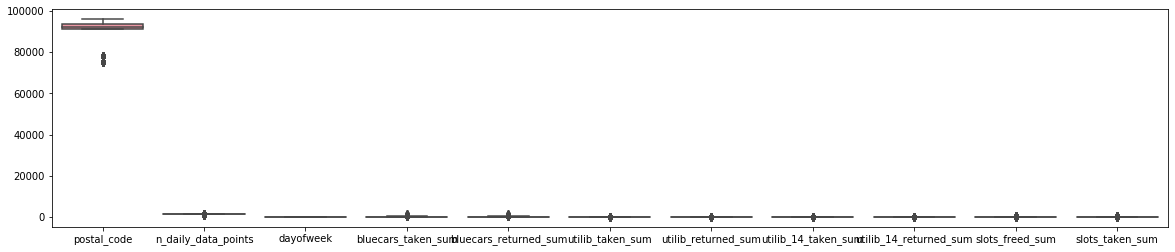

In [0]:
# Check for Outliers
plt.figure(figsize=(20,4))
sns.boxplot(data=df, showmeans=False)

#There is presence of outliers in our dataset
#I shall not remove the outliers
#However,it shows that there are certain days where many cars were picked from the stations and 
#very many were returned 



## 2.Accuracy

In [0]:
#For this case,i can not check the accuracy since the dataset does  not include 
#additions,subtractions etc 

## 3.Completeness

In [0]:
#check for any missing data
df.isnull().sum()
#The results show that we have complete datasets 
#No need to fill in out dataset 

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

## 4.Consistency

In [0]:
#Check for duplicates
df.duplicated().sum()
# no duplicates found

0

## 5.Uniformity

# Univariate Analysis

## Categorical 

In [0]:
df.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

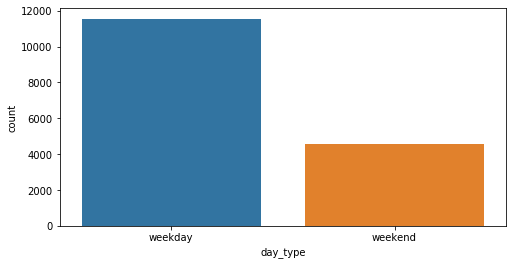

In [0]:
plt.figure(figsize=(8, 4))
sns.countplot(df.day_type,order = df.day_type.value_counts().index)

## Numerical

### 1.Histograms

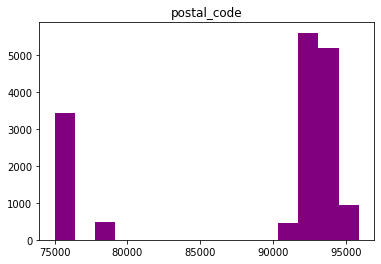

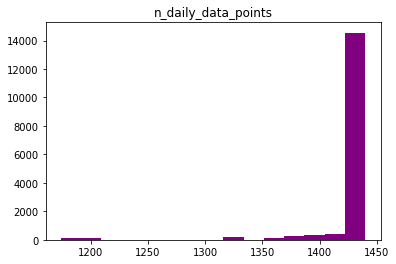

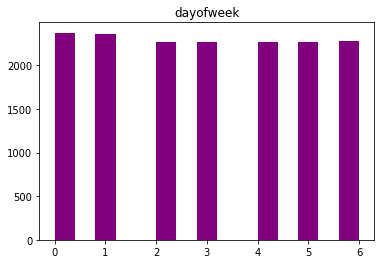

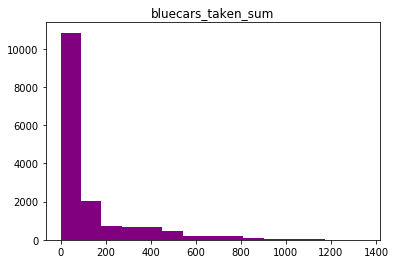

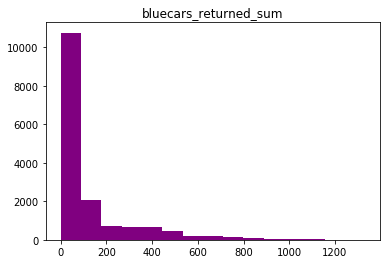

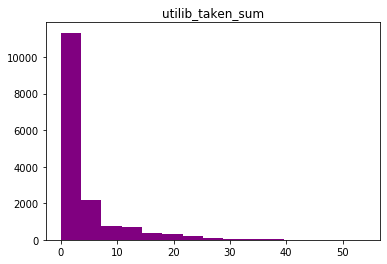

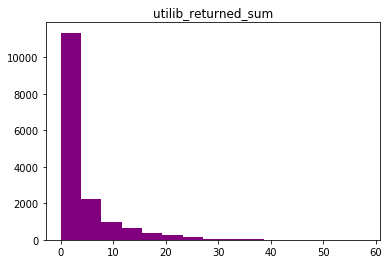

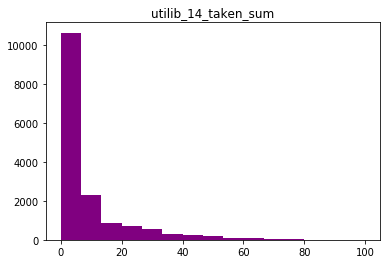

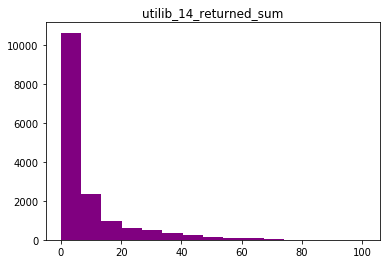

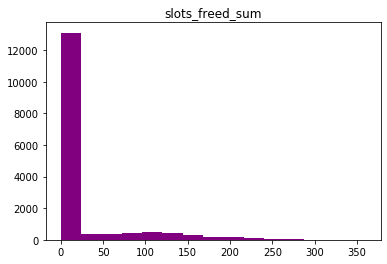

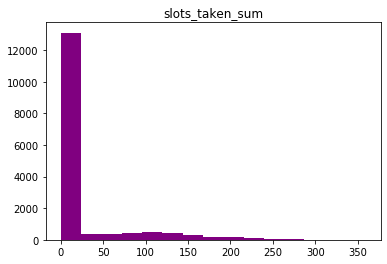

In [0]:
Numerical = ['postal_code', 'n_daily_data_points', 'dayofweek',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']
for col in Numerical:
  plt.hist(df[col],bins=15,color="purple")
  plt.title(col)
  plt.show()


### 2.Measures of Central Tendency

In [0]:
df.bluecars_taken_sum.mean()

125.92695057506994

In [0]:
df.bluecars_returned_sum.mean()

125.912713708424

In [0]:
df.utilib_taken_sum.mean()

3.69829033260802

In [0]:
df.utilib_returned_sum.mean()

3.6990985390115014

In [0]:
df.utilib_14_taken_sum.mean()

8.600559527510102

In [0]:
df.utilib_14_returned_sum.mean()

8.599191793596518

In [0]:
df.slots_freed_sum.mean()

22.62903326080199

In [0]:
df.slots_taken_sum.mean()

22.629281939695367

# Bivariate Analysis

In [0]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## Categorical and Numerical

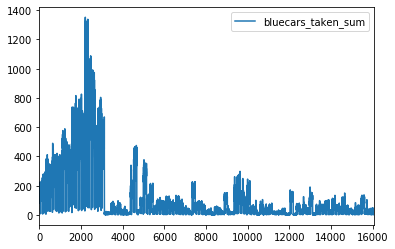

In [0]:
df[["bluecars_taken_sum"]].plot()


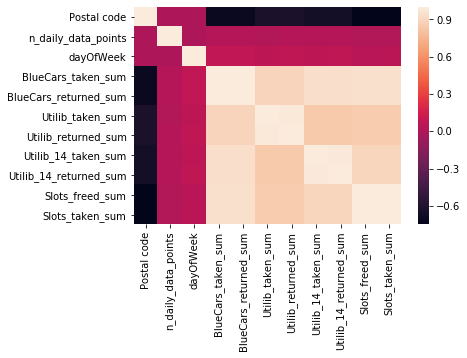

In [22]:
df1 = df.corr()
sns.heatmap(df1)

#Sampling

In [36]:
weekend=df[(df['day_type']=='weekend')]
weekend

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,95880,6/3/2018,1440,6,weekend,36,33,1,1,2,2,0,0
16074,95880,6/9/2018,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0


In [103]:
# Simple Random Sampling 
weekend_sample = weekend.sample(n = 10, replace="False")
weekend_sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
4326,91400,4/29/2018,1440,6,weekend,15,18,0,0,0,1,0,0
14761,94340,3/24/2018,1440,5,weekend,57,57,0,0,4,5,0,0
15600,94800,6/3/2018,1440,6,weekend,124,111,2,1,15,16,0,0
14567,94300,2/11/2018,1440,6,weekend,94,97,0,0,3,3,0,0
1430,75010,1/27/2018,1440,5,weekend,461,479,20,20,27,31,113,119
1430,75010,1/27/2018,1440,5,weekend,461,479,20,20,27,31,113,119
14567,94300,2/11/2018,1440,6,weekend,94,97,0,0,3,3,0,0
14761,94340,3/24/2018,1440,5,weekend,57,57,0,0,4,5,0,0
14173,94160,4/29/2018,1440,6,weekend,69,71,2,2,5,6,5,6
1430,75010,1/27/2018,1440,5,weekend,461,479,20,20,27,31,113,119


In [0]:
for i in weekend_sample["dayOfWeek"]:
  if i == 5:
    weekend_sample["day_5"]=weekend_sample['dayOfWeek']==5
  else:
    weekend_sample["day_6"]=weekend_sample['dayOfWeek']==6


In [105]:
weekend_sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,day_6,day_5
4326,91400,4/29/2018,1440,6,weekend,15,18,0,0,0,1,0,0,True,False
14761,94340,3/24/2018,1440,5,weekend,57,57,0,0,4,5,0,0,False,True
15600,94800,6/3/2018,1440,6,weekend,124,111,2,1,15,16,0,0,True,False
14567,94300,2/11/2018,1440,6,weekend,94,97,0,0,3,3,0,0,True,False
1430,75010,1/27/2018,1440,5,weekend,461,479,20,20,27,31,113,119,False,True
1430,75010,1/27/2018,1440,5,weekend,461,479,20,20,27,31,113,119,False,True
14567,94300,2/11/2018,1440,6,weekend,94,97,0,0,3,3,0,0,True,False
14761,94340,3/24/2018,1440,5,weekend,57,57,0,0,4,5,0,0,False,True
14173,94160,4/29/2018,1440,6,weekend,69,71,2,2,5,6,5,6,True,False
1430,75010,1/27/2018,1440,5,weekend,461,479,20,20,27,31,113,119,False,True


#Hypothesis Testing 

In my analysis, i would like to know between Sunday and Saturday,which cars are mostly used

Ho = no of cars taken on saturday >= no of cars taken on sunday

Ha = no of cars taken on saturday < no of cars taken on sunday

Our level of sifnificance shall be 0.05

In [114]:
#I decided not to let the date affect my analysis since this occurred in 2018
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_taken_sum.sum()
df2

dayOfWeek
5    1497
6     396
Name: BlueCars_taken_sum, dtype: int64

In [115]:
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_returned_sum.sum()
df2

dayOfWeek
5    1551
6     394
Name: BlueCars_returned_sum, dtype: int64

In [117]:
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_taken_sum.mean()
df2

dayOfWeek
5    299.4
6     79.2
Name: BlueCars_taken_sum, dtype: float64

In [119]:
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_taken_sum.std()
df2

dayOfWeek
5    221.279913
6     40.837483
Name: BlueCars_taken_sum, dtype: float64

In [118]:
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_returned_sum.mean()
df2

dayOfWeek
5    310.2
6     78.8
Name: BlueCars_returned_sum, dtype: float64

In [120]:
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_returned_sum.std()
df2

dayOfWeek
5    231.138919
6     36.935078
Name: BlueCars_returned_sum, dtype: float64

## T test


The sample that i am working with is less than 30.Therefore,i have resulted in using the t-test

In [0]:
#Saturday Blue cars taken
x = (299.4 - 300)/221.279913

In [0]:
#Blue cars returned
t = (310.2-300)/231.138919

###P value

In [129]:
#Blue cars taken
from scipy import stats
from scipy.stats import norm
prob = stats.norm.cdf(x)
prob

0.49891827020498675

In [132]:
prob = stats.norm.cdf(t)
prob

0.5175993334919112

The p value is greater than the level of significance.
Therefore,we fail to reject the null hypothesis 

In [0]:
#Sunday
 y = (79.2 -80)/ 40.837483

In [0]:
h = (78.8-80)/36.935078

In [135]:
## P value 
prob = stats.norm.cdf(y)
prob

0.49218528202857653

In [136]:
prob = stats.norm.cdf(h)
prob

0.48704086862855656

The p value is greater than the level of significance.
Therefore,we fail to reject the null hypothesis 

#CONCLUSION
We therefore accept the null hypothesis.We also agree that most blue cars are used on Saturday compared to Sunday
This could be due to different assumptions:
1. It is after a weekdat and most people want to run their errands
2. Most of the social activities normally take place during this day


#RECOMMENDATION
The company should make the blue cars readily available for consumers on this day.This shall increase the profit margin for the company